<a href="https://colab.research.google.com/github/scardenol/RP_argos/blob/main/genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
# np.random.seed(42)

# array: np.array, [list, ..., list], list

def generate_population(P_size: 'tuple') -> 'array':
  P = 0.1*np.random.chisquare(df=1, size=P_size) # Initial population
  return P.tolist()

def mse(A: 'array', B: 'array') -> float: # Cleanest way to calculate MSE
  return np.square(np.subtract(A, B)).mean()

def fitness(X: 'array', Y: list, P: 'array', fun: 'function') -> list:
  '''
  X = [X1, X2, ..., Xn]: observations of predictors
  Y: observations of variable of interest
  P = [theta1, theta2, ..., thetan]: population (possible parameters)
  '''
  Y_bar = [[fun(*[item[i] for item in X], *P[j]) for i in range(len(X[0]))] for j in range(len(P))]
  fitness = [mse(Y_bar[i], Y) for i in range(len(P))]
  return fitness, Y_bar

def selection(P: 'array', fitness: list) -> 'array':
  return random.choices(population=P, weights=fitness, k=2)

def crossover(x: list, y: list) -> 'Tuple' : # Single point
  if len(x) != len(y):
    raise ValueError("Parents x and y need to be of same length")

  length = len(x)

  if length < 2:
    return x, y

  p = random.randint(1, length-1)
  return x[0:p] + y[p:], y[0:p] + x[p:]

def mutation(x: list, probability: float, num: int) -> list:
  for _ in range(num):
    index = random.randrange(len(x))
    value = random.randint(1,1)*np.random.uniform(-1.0, 1.0, 1) # Uniform mutation
    x[index] = x[index] if random.random() > probability else x[index] + value[0]
  return x

def evolution():
  return

In [2]:
X = [[1,2,3,4], [2.1, 4.1, 6.1, 8.1]]
Y = [2, 4, 6, 8]
P = [[0.1, 0.2, 0.3, 0.4], [0, 1, 2, 3], [4, 3, 2, 1], [10, 8, 6, 4], [4, 6, 8, 10]]

def fun(x1, x2, a, b, c, d):
  return (a*x1 + b*x2 + c + d)

fit, _ = fitness(X,Y,P,fun)
generate_population(np.array(P).shape)
sel = selection(P, fit)
print(sel)
x, y = crossover(sel[0], sel[1])
print(x, y)
mutation(x, 1, 1)
lambda X, Y, P, fun: fitness(X,Y,P,fun)

[[10, 8, 6, 4], [10, 8, 6, 4]]
[10, 8, 6, 4] [10, 8, 6, 4]


<function __main__.<lambda>>

In [11]:
import time
start = time.time()
m_prob = 0.5 # Probabilidad de mutación 
P = generate_population((5,4)) # (individuos, parámetros)
generations = 1000

for i in range(generations):
  fit, _ = fitness(X,Y,P,fun)
  P = [a for _, a in sorted(zip(fit, P))] # Ordena la población de menor a mayor fitness
  
  next_generation = P[0:2] # Guarda los 2 mejores

  for j in range(int(len(P) / 2) - 1):
    parents = selection(P,fit)
    x, y = crossover(parents[0], parents[1])
    x = mutation(x, m_prob, 1)
    next_generation += [x,y]

  P = next_generation
  fit, Y_bar = fitness(X,Y,P,fun)
  P = [a for _, a in sorted(zip(fit, P))] # Ordena la población de menor a mayor fitness
  current_time = time.time()-start
  minutes = round((current_time // 60) % 60, 0)
  seconds = round(current_time % 60, 0)
  print('Generation: ', str(i))
  print('time: ', int(minutes), "m", int(seconds), "s")

print(f'best solution: {P[0]}')
print(f'Fitness: {fit[0]}')
print(f'Y_hat: {Y_bar[0]}')

Generation:  0
time:  0 m 0 s
Generation:  1
time:  0 m 0 s
Generation:  2
time:  0 m 0 s
Generation:  3
time:  0 m 0 s
Generation:  4
time:  0 m 0 s
Generation:  5
time:  0 m 0 s
Generation:  6
time:  0 m 0 s
Generation:  7
time:  0 m 0 s
Generation:  8
time:  0 m 0 s
Generation:  9
time:  0 m 0 s
Generation:  10
time:  0 m 0 s
Generation:  11
time:  0 m 0 s
Generation:  12
time:  0 m 0 s
Generation:  13
time:  0 m 0 s
Generation:  14
time:  0 m 0 s
Generation:  15
time:  0 m 0 s
Generation:  16
time:  0 m 0 s
Generation:  17
time:  0 m 0 s
Generation:  18
time:  0 m 0 s
Generation:  19
time:  0 m 0 s
Generation:  20
time:  0 m 0 s
Generation:  21
time:  0 m 0 s
Generation:  22
time:  0 m 0 s
Generation:  23
time:  0 m 0 s
Generation:  24
time:  0 m 0 s
Generation:  25
time:  0 m 0 s
Generation:  26
time:  0 m 0 s
Generation:  27
time:  0 m 0 s
Generation:  28
time:  0 m 0 s
Generation:  29
time:  0 m 0 s
Generation:  30
time:  0 m 0 s
Generation:  31
time:  0 m 0 s
Generation:  32
ti

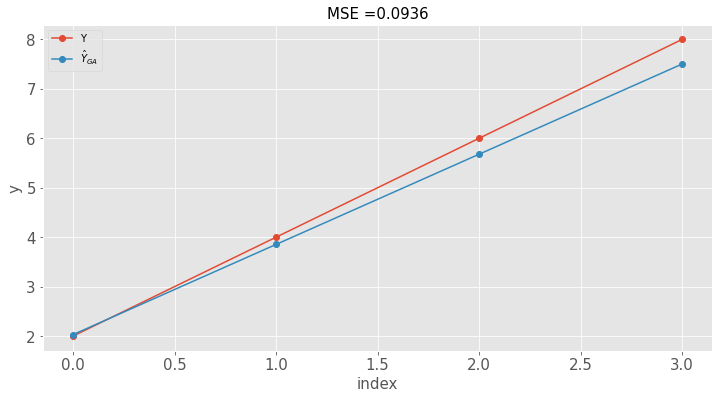

In [12]:
import matplotlib.pyplot as plt #gráficas
import matplotlib as mpl
import seaborn as sns #gráficas
plt.style.use('ggplot') #estilo de graficas

mse_GA = mse(Y_bar[0],Y)
T = list(range(len(Y)))

# Plot data and results
plt.figure(figsize = (12, 6));
plt.plot(T, Y, '-o', label='Y')
plt.plot(T, Y_bar[0], '-o', label='$\hat{Y}_{GA}$')
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('index', fontsize = 15);
plt.ylabel('y', fontsize = 15);
plt.legend()
plt.title('MSE =' + str(round(mse_GA, 4)), fontsize = 15);

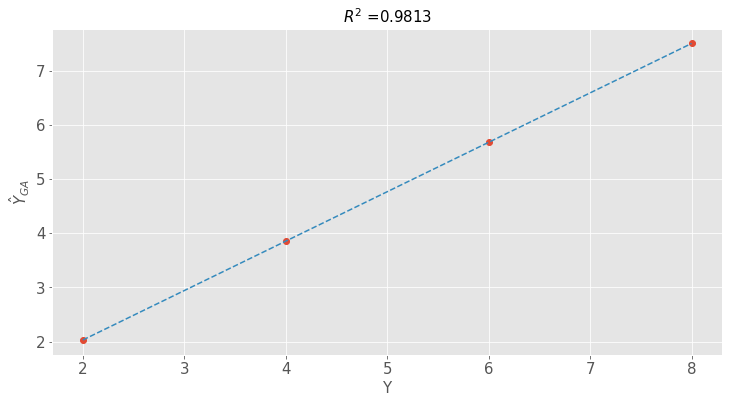

In [13]:
# Plot model fit

plt.figure(figsize = (12, 6));
plt.plot(Y, Y_bar[0], 'o')
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('Y', fontsize = 15);
plt.ylabel('$\hat{Y}_{GA}$', fontsize = 15);
RES = sum([(Y[i] - Y_bar[0][i])**2 for i in range(len(Y))]) # residual error
TOT = sum([(Y[i] - np.mean(Y))**2 for i in range(len(Y))]) # total error
R2 = 1-(RES/TOT) # definition of R2 metric
plt.title('$R^2$ =' + str(round(R2, 4)), fontsize = 15);

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(Y, Y_bar[0], 1);

#add linear regression line to scatterplot 
plt.plot(Y, [m*i+b for i in Y], '--');